In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!pip install konlpy

In [2]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [3]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


In [4]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [5]:
import konlpy
import nltk
from konlpy.tag import Kkma ### 꼬꼬마
from konlpy.tag import Hannanum ### 한나눔
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [6]:
import pandas as pd
# 여름 인기차트 제목에 '여름' 이 많이 들어갈까?

chart_20_06 = pd.read_excel("/content/melon_2020.06.xlsx")
chart_20_07 = pd.read_excel("/content/melon_2020.07.xlsx")
chart_20_08 = pd.read_excel("/content/melon_2020.08.xlsx")

chart_20_summer = chart_20_06['제목']+chart_20_07['제목']+chart_20_08['제목']
chart_20_summer.to_csv("chart_2020_summer.csv")

doc_ko = open("/content/chart_2020_summer.csv").read()
doc_ko[1:2000]

from konlpy.tag import Okt
t = Okt()
doc_nouns = t.nouns(doc_ko)

print( len( doc_nouns ) )

211


In [7]:
ko = nltk.Text(doc_nouns, name="여름_차트")
print(type(ko))
print(len(ko.tokens))


<class 'nltk.text.Text'>
211


In [8]:
most_fre = ko.vocab().most_common(50)
most_fre

[('사랑', 12),
 ('너', 9),
 ('모든', 6),
 ('밤', 5),
 ('나', 4),
 ('널', 4),
 ('로', 3),
 ('줄', 3),
 ('그', 3),
 ('여름', 3),
 ('살짝', 3),
 ('나비', 3),
 ('고양이', 3),
 ('백현', 3),
 ('사람', 3),
 ('소개', 3),
 ('시작', 3),
 ('처음처럼', 3),
 ('꽃', 3),
 ('속', 3),
 ('네', 3),
 ('샴푸', 3),
 ('향', 3),
 ('노래', 3),
 ('것', 3),
 ('위', 3),
 ('시', 3),
 ('마음', 3),
 ('이별', 3),
 ('거지', 3),
 ('집', 3),
 ('앞', 3),
 ('골목길', 3),
 ('오늘', 3),
 ('온', 3),
 ('날', 3),
 ('순간', 3),
 ('왜', 3),
 ('다시', 2),
 ('여기', 2),
 ('바닷가', 2),
 ('비', 2),
 ('마리아', 2),
 ('깡', 2),
 ('보라', 2),
 ('빛', 2),
 ('안', 2),
 ('싹', 2),
 ('황광희', 2),
 ('난', 2)]

In [9]:
print(len(set(ko.tokens)))

87


In [10]:
stop_words = ['시', '거지', '내', '네', '건', '것', '길잡이', 
              '나', '너', '널','이','안', '시', '위', '취기', '정은지', '양요섭', '산들',
              '취향', '저격', '롤린', '로', '마', '말', '아이', '적재', '기리보이',
              '운전', '만해', '서동현', '허각', '선미','움찔', '앞', '규현',
              '제목', '라일락', '손', '라라라', '속', '건호', '건호', '온', '거',
              '로','줄','그','황광희','백현', '네', '싹','깡','비','안','난','다시','여기','마리아']
new_ko = [ ]
for one_word in ko:
  if one_word not in stop_words:
    new_ko.append(one_word) 
print(new_ko)

['바닷가', '사랑', '여름', '바닷가', '살짝', '보라', '빛', '밤', '나비', '고양이', '사람', '소개', '사랑', '여름', '넌', '살짝', '여름', '시작', '홀로', '처음처럼', '윤미래', '보라', '빛', '밤', '고백', '마마', '무', '꽃', '샴푸', '향', '살짝', '노래', '사랑', '노래', '꽃', '샴푸', '향', '그녀', '나비', '고양이', '덤디덤디', '그대', '사랑', '처음처럼', '덤', '더럼', '사람', '소개', '꽃', '샴푸', '향', '시작', '노래', '눈물', '환상', '동화', '처음처럼', '마음', '이별', '사랑', '사랑', '밤', '집', '골목길', '밤', '집', '골목길', '시작', '이제', '이별', '사랑', '사랑', '사랑', '더욱', '남아', '그때', '아인', '돌', '덩이', '창모', '마음', '사랑', '넌', '밤', '집', '골목길', '오늘', '창모', '이별', '사랑', '사랑', '고백', '사람', '소개', '오늘', '나비', '고양이', '모든', '날', '모든', '순간', '오늘', '취', '이제', '모든', '날', '모든', '순간', '마음', '반', '환상', '동화', '덤', '더럼', '그때', '아인', '모든', '날', '모든', '순간', '답', '거짓말', '우리', '왜', '해사', '더욱', '남아', '우리', '왜', '왜', '해', '깡돌', '덩이']


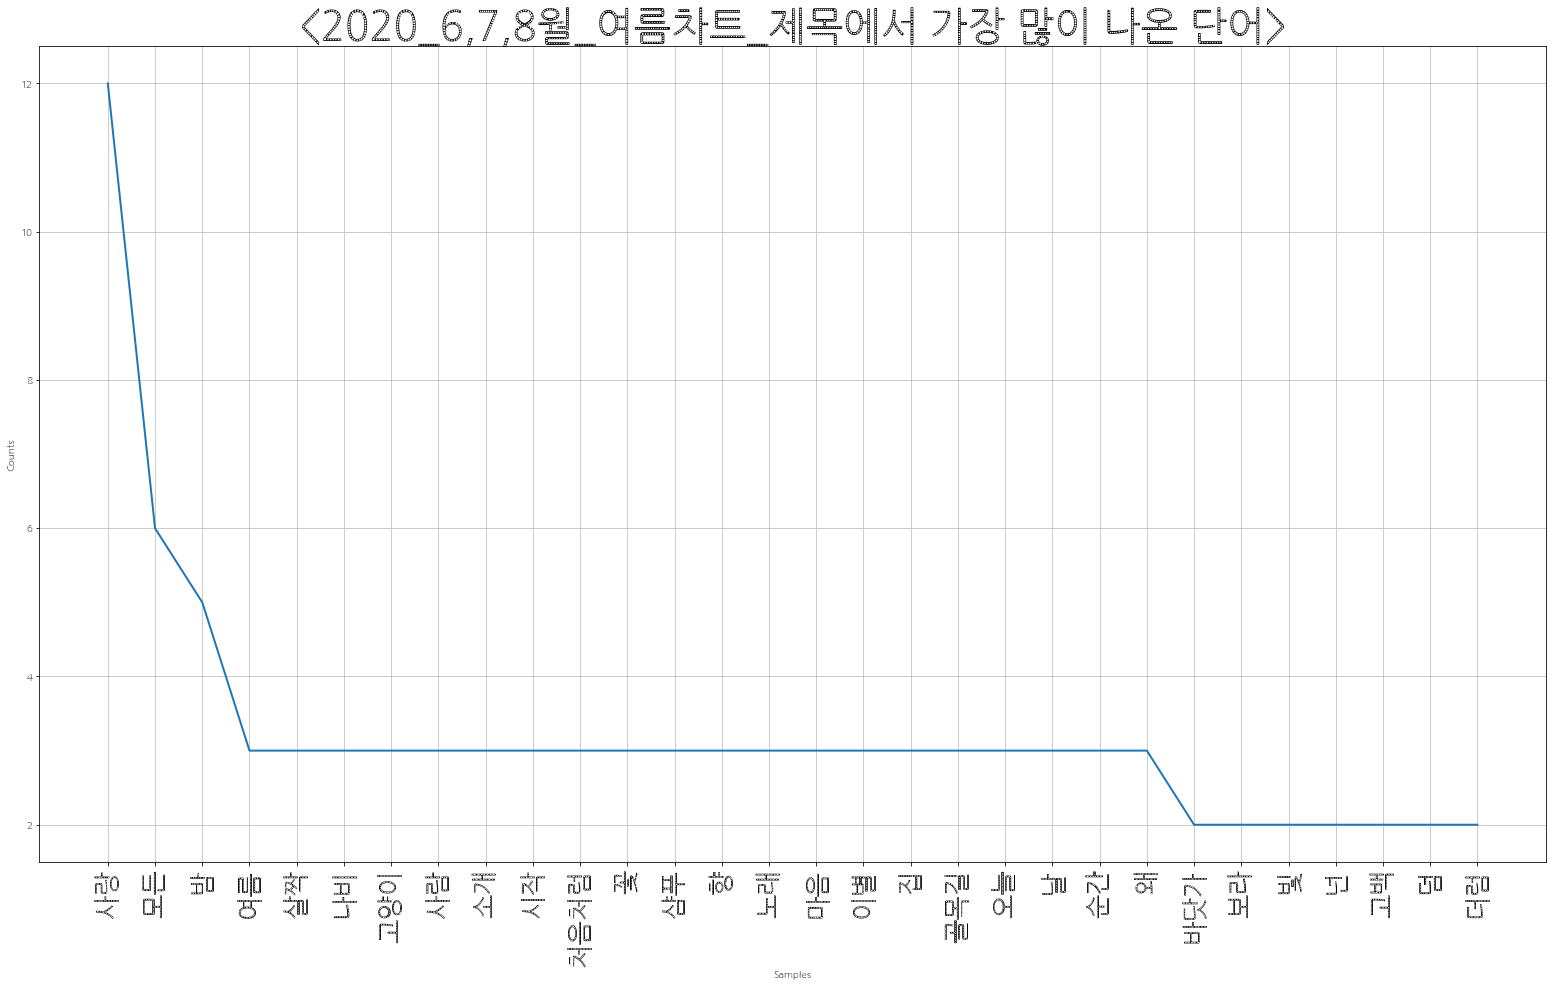

In [11]:
### nltk Text 객체 만들기
new_ko = nltk.Text(new_ko, name="여름_2020")
plt.figure(figsize=(27,15))
plt.title("<2020_6,7,8월_여름차트_제목에서 가장 많이 나온 단어>", fontsize=40)
plt.xticks(fontsize=26)
new_ko.plot(30)

In [12]:
data = new_ko.vocab().most_common(1000)

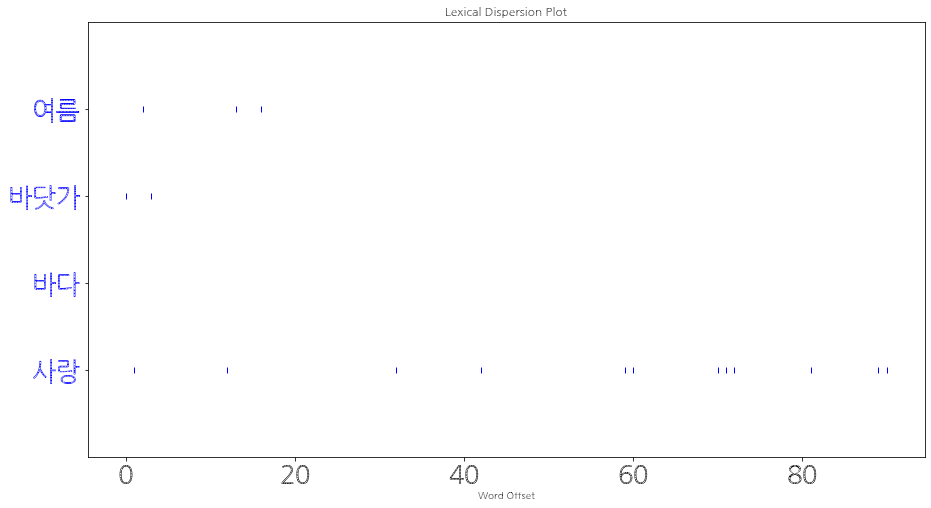

In [13]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
new_ko.dispersion_plot(['여름', '바닷가', '바다','사랑'])

> 이미지 워드클라우드 마스크

In [14]:
# pip install stylecloud
# import stylecloud

# my_long_list = ['시', '거지', '내', '네', '건', '것', '길잡이', 
#               '나', '너', '이', '시', '위', '취기', '정은지', '양요섭', '산들',
#               '취향', '저격', '롤린', '로', '마', '말', '아이', '적재', '기리보이',
#               '운전', '만해', '서동현', '허각', '선미','움찔', '앞', '규현']

# text={"연애":500, "밤하늘":253, "봄":233, "봄날":323, "꽃":322}

# stylecloud.gen_stylecloud(text=text, icon_name="fab fa-itunes-note", 
#                           palette='cartocolors.diverging.TealRose_7', 
#                           custom_stopwords=my_long_list, 
#                           font_path="/content/BMHANNAProOTF.otf")

# stylecloud.gen_stylecloud(file_path="/content/chart_2021_spring", 
#                           icon_name="fab fa-itunes-note", 
#                           palette='cartocolors.diverging.TealRose_7')
# stylecloud.png

In [15]:
summer_mask = np.array(Image.open("/content/sun_icon.png"))
summer_mask[0]


array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [16]:
wc = WordCloud(font_path="/content/D2Coding.ttf",
              background_color='white', 
               max_words=200,
               mask=summer_mask,   
               contour_width=3, 
               contour_color='yellow').generate_from_frequencies(dict(data))

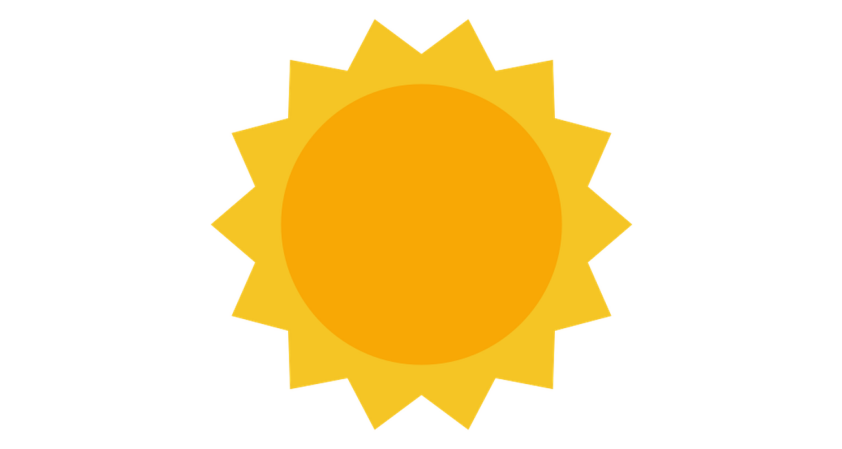

In [17]:
plt.figure(figsize=(15,8)) # 크기
plt.imshow(summer_mask, cmap=plt.cm.gray) #bilinear - 보정
plt.axis('off')
plt.show()

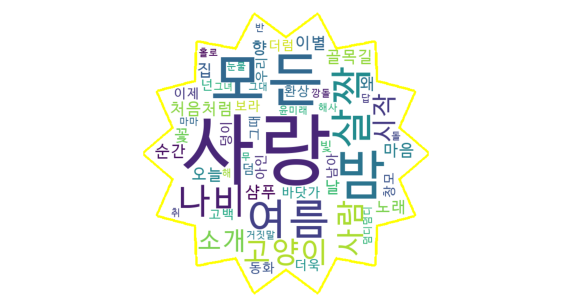

In [18]:
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis("off")
plt.show()